<a href="https://colab.research.google.com/github/yuri-spizhovyi-mit/ET6-ML/blob/main/Session1__data_analysis/notebooks/DataVisualization_HW1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# MIT License
#
# @title Copyright (c) 2025 Ana Trisovic { display-mode: "form" }

# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Welcome to the UAI Course on Effective Data Visualization

## Part I: Exploring Categorical and Time Series Data

<small>Expected completion time: 30 minutes</small>

### Ana Trisovic

### Quick Overview

This homework reviews the foundational concepts of data visualization in Python and provides hands-on experience with key techniques for exploring data trends. You'll learn how to create and customize common chart types—like pie charts, line plots, and bar graphs—using libraries such as `matplotlib` and `seaborn`.

Through multiple examples, we emphasize not just how to visualize data, but also how to enhance visual appeal and clarity using styles, color palettes, and layout customization. By the end, you’ll be comfortable building aesthetically pleasing and insightful charts from scratch.

<small>See also:</small>
- <small>Previous</small>
- <small>Next</small>

## Getting Started: Software Prerequisites & Setup

### 📦 Package Requirements

In this course, we'll be working with three essential Python libraries for data visualization These packages serve distinct and complementary purposes:

- **Pandas**: for handling and manipulating structured datasets.
- **Matplotlib**: the foundational plotting library for Python, offering fine-grained control over plots.
- **Seaborn**: built on top of Matplotlib, it provides a high-level interface for creating attractive and informative statistical graphics.

### 🛠 Installation

If these packages are not already installed in your environment, you can install them using `pip`

💬 You may see a warning or version compatibility notice (especially in environments like Google Colab). As long as the core functionality works, these can typically be ignored.

In [2]:
!pip install seaborn pandas matplotlib

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")

# Clone once per session
!git clone https://github.com/yuri-spizhovyi-mit/ET6-ML.git

# Move into the correct folder
%cd ET6-ML

Cloning into 'ET6-ML'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 112 (delta 51), reused 17 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (112/112), 4.65 MiB | 6.05 MiB/s, done.
Resolving deltas: 100% (51/51), done.
/content/ET6-ML


### Basic Plots (Bar Chart, Pie Chart, Line Chart)

Here’s a quick overview of **basic plot types** used in data visualization, with common use cases and distinguishing features.

## 2023 PEW RESEARCH CENTER NPORS INTERNET TOPLINE


To better understand Americans’ social media use, Pew Research Center surveyed 5,733 U.S. adults from May 19 to Sept. 5, 2023. Ipsos conducted this National Public Opinion Reference Survey (NPORS) for the Center using address-based sampling and a multimode protocol that included both web and mail. This way nearly all U.S. adults have a chance of selection. The survey is weighted to be representative of the U.S. adult population by gender, race and ethnicity, education and other categories.

A note on terminology: Our May-September 2023 survey was already in the field when Twitter changed its name to “X.” The terms Twitter and X are both used in this report to refer to the same platform.

The full report is available [here](https://www.pewresearch.org/internet/wp-content/uploads/sites/9/2024/01/PI_2024.01.31_Social-Media-use_report.pdf).

## 📊 1. **Bar Chart**
Let's now create bar charts, which can be very useful:
- **Use for:** Comparing quantities across categories.
- **Variations:** Vertical (column) or horizontal bars.
- **Best for:** Discrete data like sales by region, population by country.

### Task 1
Using Pandas, read in the file `Social_Media_Usage_-_May_to_Sep_2023.csv` as a DataFrame. Name the DataFrame `df`. Feel free to check out how the first few rows of the DataFrame looks like using the `.head()` function.

In [9]:
df = pd.read_csv('Session1__data_analysis/data/Social_Media_Usage_-_May_to_Sep_2023.csv')
df.head()

,Platform,"Yes, use this","No, don't use this",No answer,Month,Year
0,Facebook,71,27,1,May-Sep,2023
1,YouTube,87,12,1,May-Sep,2023
2,Twitter (X),23,74,3,May-Sep,2023
3,Instagram,49,49,2,May-Sep,2023
4,Snapchat,28,69,3,May-Sep,2023


### Task 2
We will first create a horizontal bar chart of the values in the column `Yes, use this`. Fill in the code prompts (`TODO`) below to generate the chart.


The first prompt asks to sort `df` in ascending order by the column `Yes, use this`.

The next prompt asks to generate the stacked bar plot. Set the following parameters of the plot:
- Title = "Stacked Internet Usage Frequency by Year"
- X-axis label = "Year"
- Y-axis label = "Average Percentage (%)"
- Legend = upper left, with title of "Frequency"

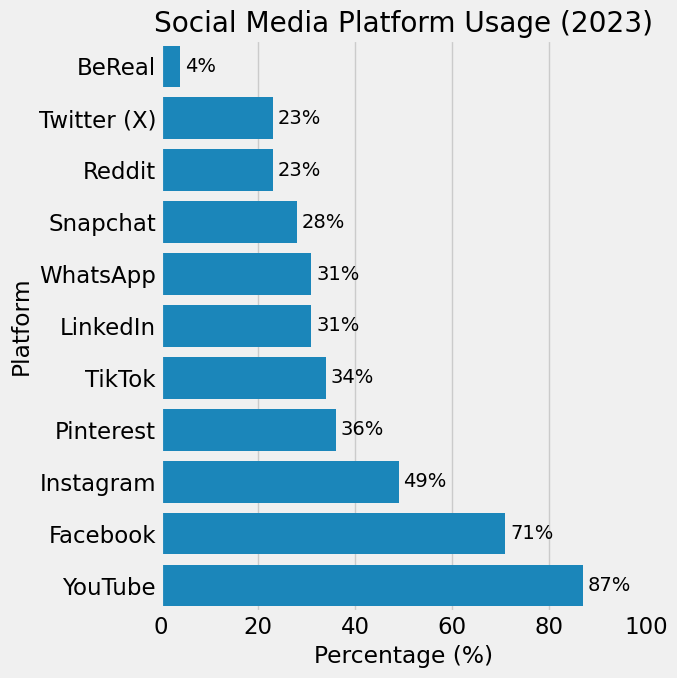

In [10]:
with plt.style.context('fivethirtyeight'):

    # Sort data in ascending order
    df_sorted = df.sort_values("Yes, use this", ascending=True)

    # Plot
    plt.figure(figsize=(7, 7))
    ax = sns.barplot(y="Platform", x="Yes, use this", data=df_sorted)

    # Add percentage labels
    for i in ax.patches:
        ax.text(i.get_width() + 1, i.get_y() + i.get_height() / 2,
                f'{i.get_width():.0f}%', va='center')

    plt.title("Social Media Platform Usage (2023)")
    plt.xlabel("Percentage (%)")
    # plt.ylabel("Platform")
    plt.xlim(0, 100)
    plt.tight_layout()
    plt.show()



### Task 3

We will now create a vertical stacked bar chart. First read in as a DataFrame the file `Internet_Usage_Frequency_Trend.csv`. Add a new column `Other` where for each row, the value of the new column is the difference between 100 and the sum of the other columns in the DataFrame (`'Almost constantly', 'Several times a day', 'About once a day', 'Several times a week', 'Less often'`).

In [11]:
df_frequency = pd.read_csv("Session1__data_analysis/data/Internet_Usage_Frequency_Trend.csv")
df_frequency["Other"] = 100 - df_frequency[['Almost constantly', 'Several times a day', 'About once a day',
       'Several times a week', 'Less often']].sum(axis=1)
df_frequency.head()

,Month,Year,Almost constantly,Several times a day,About once a day,Several times a week,Less often,No answer,Other
0,May-Sep,2023,43,45,6,3,2,1,1
1,Jan,2021,33,51,6,5,4,*,1
2,Feb,2019,31,49,10,5,4,*,1
3,Jan,2018,30,49,9,7,5,*,0
4,May,2016,25,50,11,7,6,*,1


### Task 4

Let's now plot the vertical stacked bar chart by completing the code prompts (`TODO`) below.

The first prompt asks to sort `df_frequency` by the column `Year` and then to set `Year` as the index.

The next prompt asks to generate the stacked bar plot. Remember to set the argument `stacked=True` in the `.plot()` function. Set the following parameters of the plot:
- Title = "Stacked Internet Usage Frequency by Year"
- X-axis label = "Year"
- Y-axis label = "Average Percentage (%)"
- Legend = upper left, with title of "Frequency"

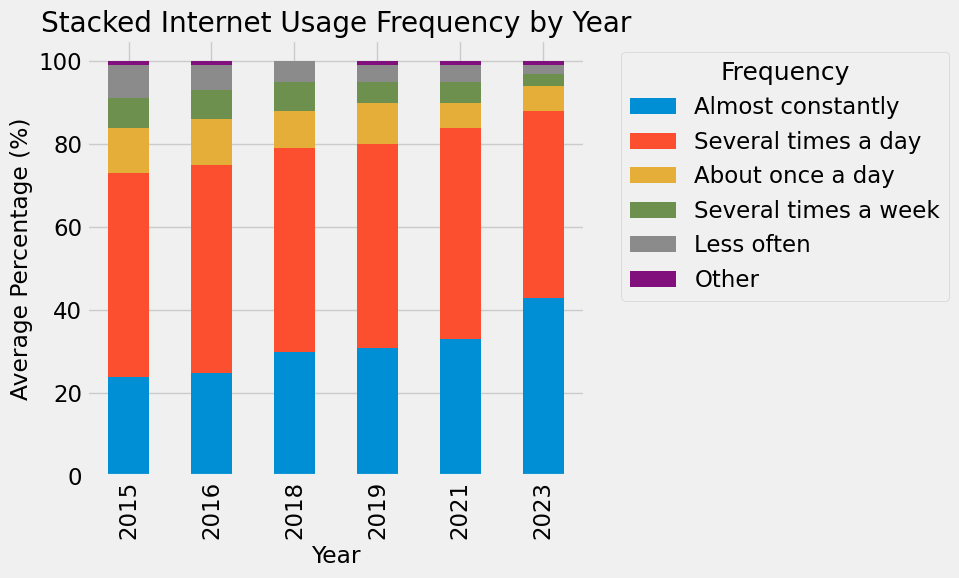

In [39]:
with plt.style.context('fivethirtyeight'):

    # Group by "Year" and compute average for each category
    df_frequency = df_frequency.sort_values("Year", ascending=True)

    # Create stacked bar plot
    ax = df_frequency.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title("Stacked Internet Usage Frequency by Year")
    plt.xlabel("Year")
    plt.ylabel("Average Percentage (%)")
    plt.legend(title="Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

## 📈 2. **Line Chart**
Now that we've made bar charts, let's move to line charts. Line charts have the following characteristics:
- **Use for:** Showing trends over time (time series).
- **Best for:** Stock prices, temperature changes, revenue over months.

### Task 1
Let's first read in the file `Internet_Usage_Trend_with_Separated_Date.csv` as a DataFrame and name it as `df_usage`.

Feel free to use the `.head()` function to observe the first few rows of your DataFrame.

In [ ]:
# TODO
# df_usage =

### Task 2

Write the appropriate code in the following code prompts (`TODO`) to create the line chart.

The first prompt is to group the DataFrame by `Year` and compute each group's average value of the `Uses internet` column by using the `.agg()` function. Since you've grouped the data, don't forget to reset the index! Name this grouped DataFrame `df_usage_yearly`.

The second prompt is to generate the line chart. Use `Year` as the x-axis and `Uses nternet` as the y-axis. Make the color of the line `blue`. Add a title and axis labels: "Percentage of People Using Internet" as the title, "Year" as the x-axis label, and "Percentage (%)" as the y-label. To make it even prettier, you can set the y-axis limits to `(0,100)`.

In [ ]:
with plt.style.context('fivethirtyeight'):

    # TODO: Group by "Year" and compute average for the "Uses internet" column

    # TODO: Create line chart

### Task 3

Let's now plot line charts of the . Let's first read in the file `Historical_Social_Media_Usage` as a DataFrame and name it as df_historical.

Group the DataFrame by `Platform` and `Year`, then compute each group's average value of the `Yes, use this` column by using the `.agg()` function. Since you've grouped the data, don't forget to reset the index!

Feel free to use the `.head()` function to observe the first few rows of your newly-aggregated DataFrame.

In [ ]:
# TODO
# df_historical =

### Task 4

Let's now plot a multi-line line chart by completing the code prompts (`TODO`) below.

The first prompt asks to create subplots using the `plt.subplots` function, with a figure size of `(10,6)`, and then to create the multi-line line chart.

The second prompt asks to set the various labels for the plot:
- Title = "Platform Usage Over the Years"
- X-axis = "Year"
- Y-axis = "Percentage (%)"
- Legend = title of "Platform, location in upper left

In [ ]:
with plt.style.context('fivethirtyeight'):
    # TODO: Create subplots and line chart

    # TODO: Add labels to chart

## 🥧 3. **Pie Chart**
The next chart we will make is a pie chart. Pie charts have the following characteristics:
- **Use for:** Showing proportions or percentage breakdowns.
- **Best for:** Market share, budget allocation.
- **Note:** Avoid when there are many categories or similar-sized slices—can be hard to read.

### Task 1

Using the `df_usage` DataFrame from earlier, we will create a pie chart by writing in the code prompts (`TODO`) below.

The first prompt asks to filter `df_usage` to only those rows where the `Year` is 2023 and to select only the columns `Uses internet` and `Does not use internet` to create a filtered, subset DataFrame. Name this filtered DataFrame as `df_usage_2023`.

The second prompt asks to generate the pie chart using the `plt.pie()` function. Make sure to use the column names of `df_usage_2023` as the pie chart labels. Name the chart "Reported Internet Usage in 2023".

In [ ]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(5, 5))

    # TODO: Filter df_usage per above instructions

    # TODO: Generate pie chart

## 📉 4. **Area Chart**

Finally, we generate an area chart. Area charts have the following characteristics:

- **Use for:** Showing cumulative trends over time.
- **Similar to:** Line chart, but filled with color under the line.
- **Best for:** Total values over time (e.g., website traffic from multiple sources).

### Task 1

Use the DataFrame `df_frequency` from earlier to generate an area chart by following the code prompts (`TODO`) below.

The first code prompt asks to generate the area chart; make sure to set the `kind` argument to `area` and the `stacked` argument to `True`.

The second code prompt asks to put the appropriate labels on the chart:
- Title = "Stacked Internet Usage Frequency by Year"
- X-label = "Year"
- Y-label = "Average Percentage (%)"
- Legend = title of "Frequency" and location of upper left

In [ ]:
with plt.style.context('fivethirtyeight'):
    # TODO: Create stacked bar plot

    # TODO: Add appropriate labels